In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, recall_score, f1_score, accuracy_score

Generate single molecule spectra for model training

In [2]:
k = np.arange(900, 1800, 5)

In [3]:
a=[]

for i in range(100):
    a.append( norm.pdf( k, loc=1000+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*(1+(np.random.rand()-0.5)*2*0.1) ) 

A = pd.DataFrame(np.column_stack((k, *a)))

In [4]:
b=[]

for i in range(100):
    b.append( norm.pdf( k, loc=1400+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*(2+(np.random.rand()-0.5)*2*0.1) ) 

B = pd.DataFrame(np.column_stack((k, *b)))

In [5]:
c=[]

for i in range(100):
    c.append( norm.pdf( k, loc=1700+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*(3+(np.random.rand()-0.5)*2*0.1) ) 

C = pd.DataFrame(np.column_stack((k, *c)))

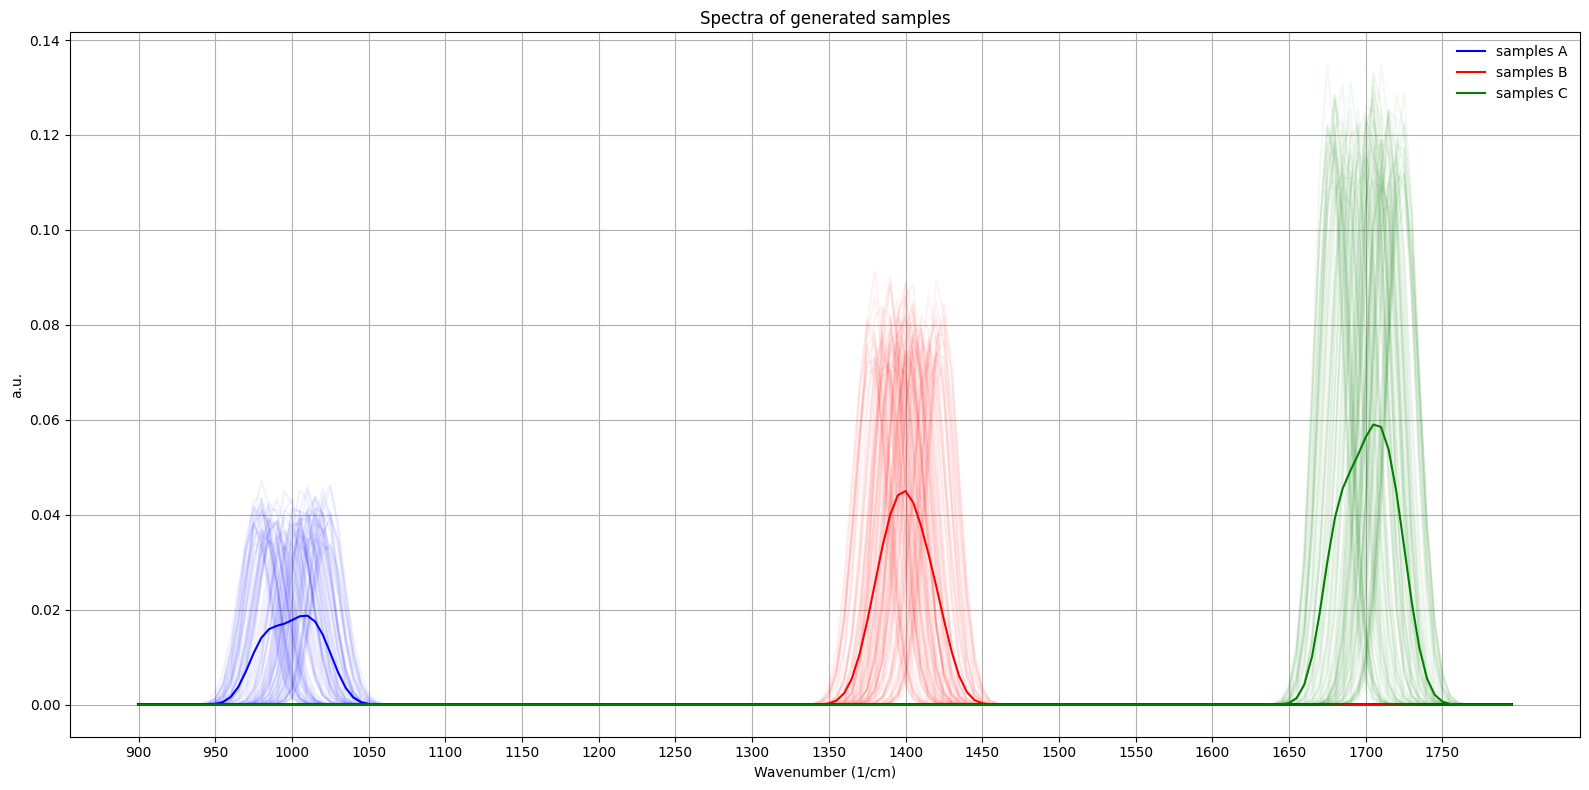

In [6]:
fig, ax = plt.subplots(figsize=[16, 8])


sample_measurement = []
A_plot = pd.melt(A, [0])
for sample, measurement in A_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="blue")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="blue", label="samples A", legend=True
)
###
sample_measurement = []
B_plot = pd.melt(B, [0])
for sample, measurement in B_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="red")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="red", label="samples B", legend=True
)
###
sample_measurement = []
C_plot = pd.melt(C, [0])
for sample, measurement in C_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="green")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="green", label="samples C", legend=True
)

ax.grid()

ax.set_ylabel("a.u.")
ax.set_title("Spectra of generated samples")
ax.set_xlabel("Wavenumber (1/cm)")
ax.legend(loc="upper right", frameon=False)

plt.tight_layout()

In [7]:
A = A.set_index([0])
A.index.names = ['Wavenumbers']
A.columns = ['A_'+str(col) for col in A.columns]

B = B.set_index([0])
B.index.names = ['Wavenumbers']
B.columns = ['B_'+str(col) for col in B.columns]

C = C.set_index([0])
C.index.names = ['Wavenumbers']
C.columns = ['C_'+str(col) for col in C.columns]

df0 = pd.concat([A,B,C], axis=1)

In [8]:
df0

,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,...,C_91,C_92,C_93,C_94,C_95,C_96,C_97,C_98,C_99,C_100
Wavenumbers,,,,,,,,,,,,,,,,,,,,,
900.0,8.938468e-25,1.372372e-16,2.688510e-31,5.239477e-17,4.722723e-24,7.680813e-16,6.234608e-28,1.424492e-12,9.864695e-17,6.284203e-38,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
905.0,1.758659e-22,6.208191e-15,8.686217e-29,4.027643e-15,5.655665e-22,3.503647e-14,1.281795e-25,3.121256e-11,4.487076e-15,5.025829e-35,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
910.0,2.612030e-20,2.225495e-13,2.165127e-26,2.308480e-13,5.336754e-20,1.249844e-12,2.052538e-23,5.530986e-10,1.621627e-13,3.030749e-32,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
915.0,2.928550e-18,6.322034e-12,4.163607e-24,9.865366e-12,3.968011e-18,3.486693e-11,2.559925e-21,7.926463e-09,4.656354e-12,1.378088e-29,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
920.0,2.478593e-16,1.423166e-10,6.177174e-22,3.143493e-10,2.324721e-16,7.606661e-10,2.486717e-19,9.186712e-08,1.062304e-10,4.724857e-27,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.185285e-07,1.167524e-10,3.715765e-12,2.790775e-23,7.601386e-13,3.257142e-16,3.848974e-08,1.444516e-06,8.458779e-16,3.930828e-10
1780.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.205979e-08,3.355408e-12,9.788415e-14,1.402014e-25,1.724042e-14,6.468717e-18,2.908414e-09,1.410168e-07,1.238992e-17,1.138196e-11
1785.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.187765e-09,7.291547e-14,1.999872e-15,5.392539e-28,3.016725e-16,1.034029e-19,1.787247e-10,1.106723e-08,1.403562e-19,2.456455e-13


In [9]:
labels_train = pd.DataFrame(df0.columns).rename(columns={0:'sample'})
labels_train.loc[labels_train['sample'].str.contains('A'),'target'] = 'A'
labels_train.loc[labels_train['sample'].str.contains('B'),'target'] = 'B'
labels_train.loc[labels_train['sample'].str.contains('C'),'target'] = 'C'
labels_train = labels_train.set_index('sample')
labels_train


,target
sample,
A_1,A
A_2,A
A_3,A
A_4,A
A_5,A
...,...
C_96,C
C_97,C
C_98,C


Generate mixed molecule spectra for testing the model

In [10]:
F=[]
abc=[]

for i in range(100):
    Fa=(1+(np.random.rand()-0.5)*2*1)
    Fb=(2+(np.random.rand()-0.5)*2*2)
    Fc=(3+(np.random.rand()-0.5)*2*3)

    

    abc.append( norm.pdf( k, loc=1000+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*Fa + \
                norm.pdf( k, loc=1400+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*Fb + \
                norm.pdf( k, loc=1700+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*Fc)

    F.append([Fa/1.,Fb/2.,Fc/3.])
    
    

In [11]:
ABC = pd.DataFrame(np.column_stack((k, *abc))).set_index([0])
ABC.index.names = ['Wavenumbers']
ABC.columns = ['ABC_'+str(col) for col in ABC.columns]

In [12]:
ABC

,ABC_1,ABC_2,ABC_3,ABC_4,ABC_5,ABC_6,ABC_7,ABC_8,ABC_9,ABC_10,...,ABC_91,ABC_92,ABC_93,ABC_94,ABC_95,ABC_96,ABC_97,ABC_98,ABC_99,ABC_100
Wavenumbers,,,,,,,,,,,,,,,,,,,,,
900.0,2.376358e-25,4.024301e-26,6.510503e-34,5.394292e-35,2.229604e-25,2.037854e-27,1.622831e-36,2.143511e-30,5.638897e-34,1.626957e-17,...,7.761340e-33,3.486865e-35,3.462425e-28,5.547237e-30,3.394422e-22,4.732733e-15,5.564674e-29,1.245667e-18,2.673033e-30,2.346489e-23
905.0,3.302006e-23,5.524576e-24,2.363640e-31,2.423474e-32,3.647771e-23,2.827669e-25,1.296485e-33,9.118784e-28,3.546704e-31,8.177535e-16,...,2.884771e-30,1.337429e-32,5.984018e-26,2.520547e-27,3.328278e-20,2.067664e-13,9.428461e-27,1.076494e-16,7.354067e-28,3.568656e-21
910.0,3.620071e-21,6.012182e-22,6.686592e-29,8.428428e-30,4.635761e-21,3.153664e-23,7.732502e-31,2.866758e-25,1.659850e-28,3.278300e-14,...,8.293369e-28,4.010210e-30,8.176951e-24,8.455648e-25,2.576513e-18,7.008109e-12,1.281681e-24,7.066158e-15,1.572501e-25,4.124728e-19
915.0,3.131338e-19,5.186685e-20,1.473957e-26,2.269130e-27,4.576232e-19,2.827053e-21,3.442954e-28,6.660213e-23,5.779971e-26,1.048227e-12,...,1.844147e-25,9.399924e-28,8.834376e-22,2.094272e-22,1.574722e-16,1.842786e-10,1.397838e-22,3.523039e-13,2.613330e-23,3.623185e-17
920.0,2.137058e-17,3.547090e-18,2.531753e-24,4.729081e-25,3.509043e-17,2.036967e-19,1.144461e-25,1.143479e-20,1.497599e-23,2.673263e-11,...,3.171796e-23,1.722433e-25,7.546514e-20,3.829599e-20,7.598613e-15,3.759258e-09,1.223128e-20,1.334178e-11,3.375495e-21,2.418746e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775.0,1.054186e-16,4.121012e-26,2.976516e-16,6.694147e-18,1.522096e-14,1.976370e-12,3.528673e-22,1.545550e-14,1.909422e-12,6.943864e-13,...,2.495971e-08,5.504291e-11,1.233499e-09,5.854641e-08,7.911132e-21,6.054715e-21,2.011846e-11,4.248411e-20,2.942315e-13,1.796930e-08
1780.0,2.031226e-18,1.219990e-28,4.978156e-18,1.097362e-19,3.910472e-16,6.768131e-14,2.578728e-24,3.073925e-16,5.160039e-14,1.202631e-14,...,1.494947e-09,1.550440e-12,4.263134e-11,2.890276e-09,6.176693e-23,5.997317e-23,8.244351e-13,3.055206e-22,5.460719e-15,1.062023e-09
1785.0,3.172374e-20,2.713404e-31,6.559467e-20,1.453395e-21,8.097469e-18,1.865432e-15,1.478220e-26,4.794067e-18,1.092944e-15,1.551678e-16,...,6.905679e-11,3.345812e-14,1.117874e-12,1.080974e-10,3.722615e-25,4.728934e-25,2.742609e-14,1.665290e-24,7.658831e-17,4.983897e-11


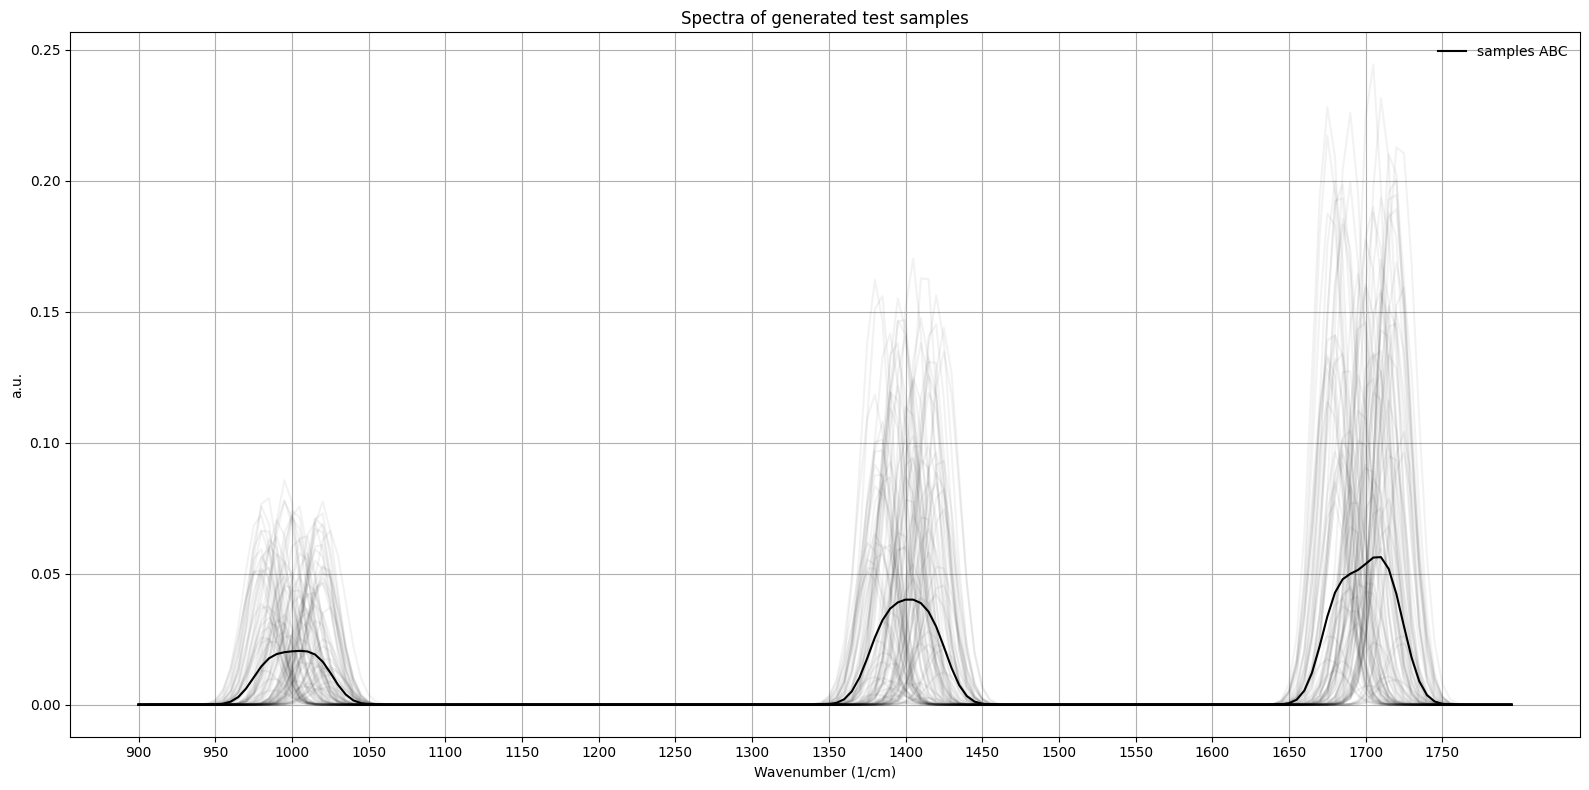

In [13]:
fig, ax = plt.subplots(figsize=[16, 8])


sample_measurement = []
ABC_plot = pd.melt(ABC.reset_index(), ['Wavenumbers'])
for sample, measurement in ABC_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="black")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="black", label="samples ABC", legend=True
)

ax.grid()

ax.set_ylabel("a.u.")
ax.set_title("Spectra of generated test samples")
ax.set_xlabel("Wavenumber (1/cm)")
ax.legend(loc="upper right", frameon=False)

plt.tight_layout()

In [14]:
df1=ABC.copy()

In [15]:
labels = pd.DataFrame(F).rename(columns={0:'A', 1:'B', 2:'C'})
labels.index = ['ABC_'+str(row+1) for row in labels.index]
labels

,A,B,C
ABC_1,1.504750,0.837140,1.828183
ABC_2,0.562015,0.888981,1.002868
ABC_3,0.562945,1.636079,0.589155
ABC_4,1.267529,0.702170,1.282506
ABC_5,1.592795,1.846334,0.710963
...,...,...,...
ABC_96,1.283494,1.369463,1.019244
ABC_97,1.850191,1.128732,1.627306
ABC_98,1.437094,1.031583,0.356317
ABC_99,1.747726,1.553595,0.687711


Now we have:

+ the single molecule spectra `df0` 
+ the mixed molecule spectra `df1`
+ `labels` with the mixing ratios of the mixed molecule spectra



Next step: Find an ML model that determines the right molecular mixing ratios from the mixed molecule spectra. 

In [16]:
X_train = df0.copy().T
X_test = df1.copy().T
y_train=labels_train.copy()

In [78]:
model = LogisticRegression()
model.fit(X_train, y_train)


/home/karol/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [107]:
y_pred = model.predict_proba(X_test)

In [108]:
y_pred[2]

array([0.14577502, 0.59690008, 0.2573249 ])

In [115]:
indiv_heights = [df0.filter(like='A_').max().mean(), 
                 df0.filter(like='B_').max().mean(), 
                 df0.filter(like='C_').max().mean()]
indiv_heights = np.array(indiv_heights)

predicted_heights = y_pred[2]*indiv_heights

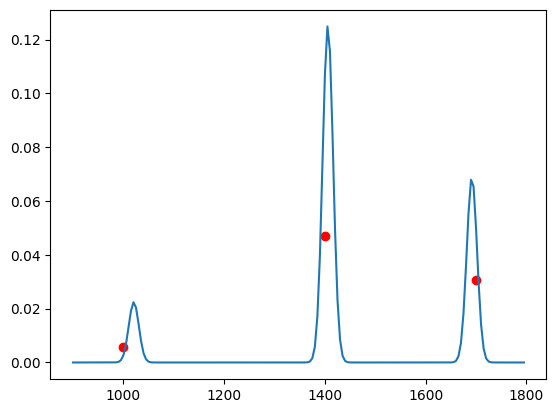

In [117]:
k = list(df0.index.unique())
plt.plot(k, np.array(X_test)[2])
plt.scatter([1000,1400,1700], predicted_heights, color='red')
plt.show()

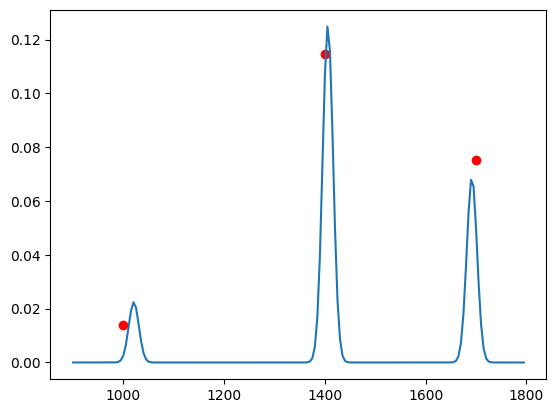

In [120]:
plt.plot(k, np.array(X_test)[2])
plt.scatter([1000,1400,1700], predicted_heights*2.45, color='red')
plt.show()

In [ ]:
# importing the required modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, Dense, MaxPooling1D, MaxPooling2D, Activation, Flatten, BatchNormalization, Dropout

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

from tensorflow.keras.optimizers import Adam

In [105]:
xtrain = np.array(df0.T)
xtrain = xtrain.reshape(300,180,1)

xtest = np.array(df1.T)
xtest = xtest.reshape(100,180,1)

ytrain = np.array(labels_train)
mapping = {'A': 0, 'B': 1, 'C': 2}
ytrain = to_categorical(np.asarray([mapping[x[0]] for x in ytrain]).astype(int))


ytest = np.array(labels)

In [256]:
# creating the tensorflow model with the above definition
from tensorflow.keras import backend as K
K.clear_session() # clear the cache of model parameters
model = Sequential([
    Conv1D(filters=6,kernel_size=(3),strides=(1),padding='same',activation='relu',input_shape=(180,1)),
    MaxPooling1D(pool_size=(2),strides=2),
    
    Conv1D(filters=16,kernel_size=(3),strides=(1),padding='same',activation='relu'),
    MaxPooling1D(pool_size=(2),strides=2),

    Flatten(),
    Dense(units=3,activation='softmax')
])
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [257]:
epochs = 200
accuracy_metrics = model.fit(xtrain,ytrain,batch_size=128,epochs=epochs,validation_split=0.3)
pred = model.predict(xtest)

Epoch 1/200
2/2 [==============================] - 1s 251ms/step - loss: 1.0990 - accuracy: 0.3619 - val_loss: 1.1237 - val_accuracy: 0.0000e+00
Epoch 2/200
2/2 [==============================] - 0s 51ms/step - loss: 1.0873 - accuracy: 0.4762 - val_loss: 1.1639 - val_accuracy: 0.0000e+00
Epoch 3/200
2/2 [==============================] - 0s 47ms/step - loss: 1.0685 - accuracy: 0.4810 - val_loss: 1.2266 - val_accuracy: 0.0000e+00
Epoch 4/200
2/2 [==============================] - 0s 64ms/step - loss: 1.0437 - accuracy: 0.4762 - val_loss: 1.3088 - val_accuracy: 0.0000e+00
Epoch 5/200
2/2 [==============================] - 0s 57ms/step - loss: 1.0163 - accuracy: 0.5048 - val_loss: 1.4030 - val_accuracy: 0.0000e+00
Epoch 6/200
2/2 [==============================] - 0s 50ms/step - loss: 0.9892 - accuracy: 0.4762 - val_loss: 1.5065 - val_accuracy: 0.0000e+00
Epoch 7/200
2/2 [==============================] - 0s 52ms/step - loss: 0.9640 - accuracy: 0.5143 - val_loss: 1.6159 - val_accuracy: 0.

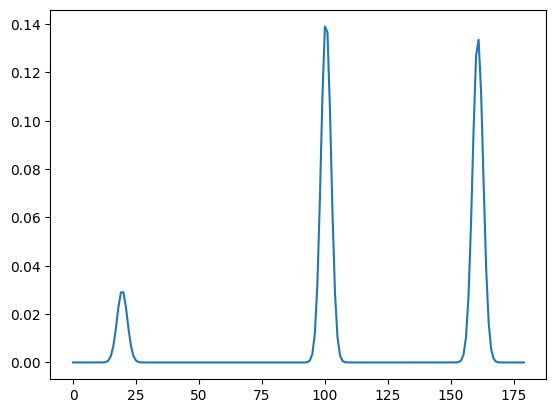

In [265]:
plt.plot(xtest[1])

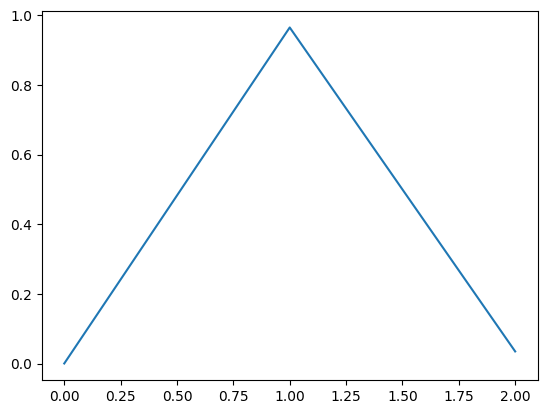

In [266]:
plt.plot(pred[1])